In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.decomposition import PCA
import joblib

In [4]:
# Load the dataset
crop = '/content/Crop_recommendation (1).csv'
data = pd.read_csv(crop)

In [5]:
# Display the first 5 rows of the dataset
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [6]:
data.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [7]:
data.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [9]:
# Checking for missing values
data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

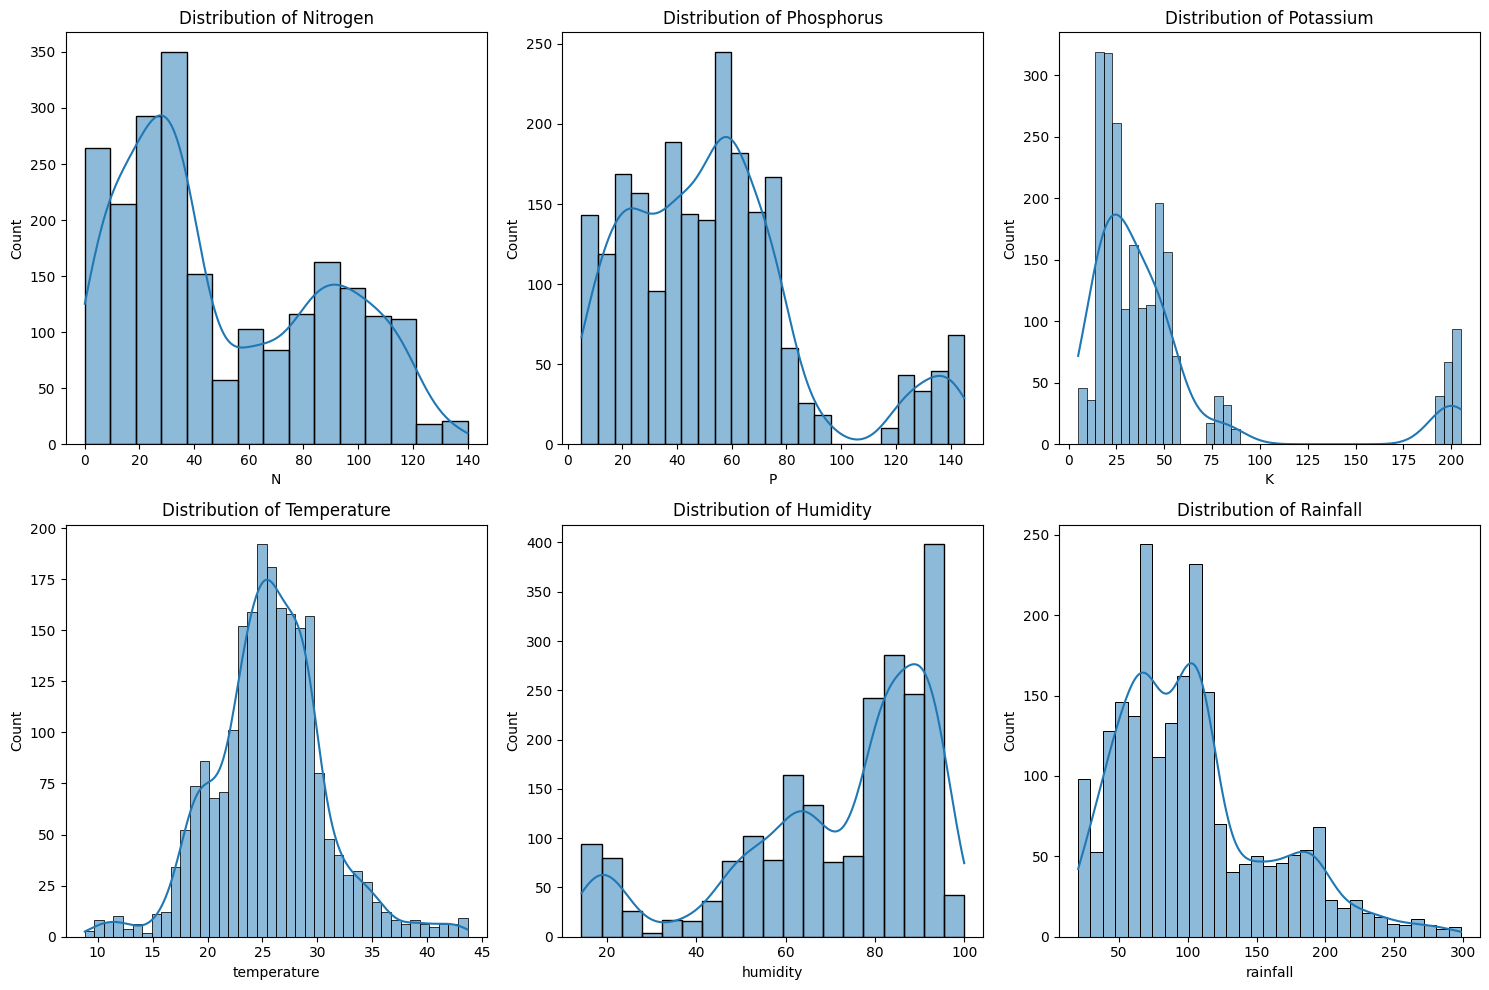

In [10]:
# Data visualization
# Distribution of features plots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
sns.histplot(data['N'], ax=axes[0, 0], kde=True)
axes[0, 0].set_title('Distribution of Nitrogen')

sns.histplot(data['P'], ax=axes[0, 1], kde=True)
axes[0, 1].set_title('Distribution of Phosphorus')

sns.histplot(data['K'], ax=axes[0, 2], kde=True)
axes[0, 2].set_title('Distribution of Potassium')

sns.histplot(data['temperature'], ax=axes[1, 0], kde=True)
axes[1, 0].set_title('Distribution of Temperature')

sns.histplot(data['humidity'], ax=axes[1, 1], kde=True)
axes[1, 1].set_title('Distribution of Humidity')

sns.histplot(data['rainfall'], ax=axes[1, 2], kde=True)
axes[1, 2].set_title('Distribution of Rainfall')

plt.tight_layout()
plt.show()

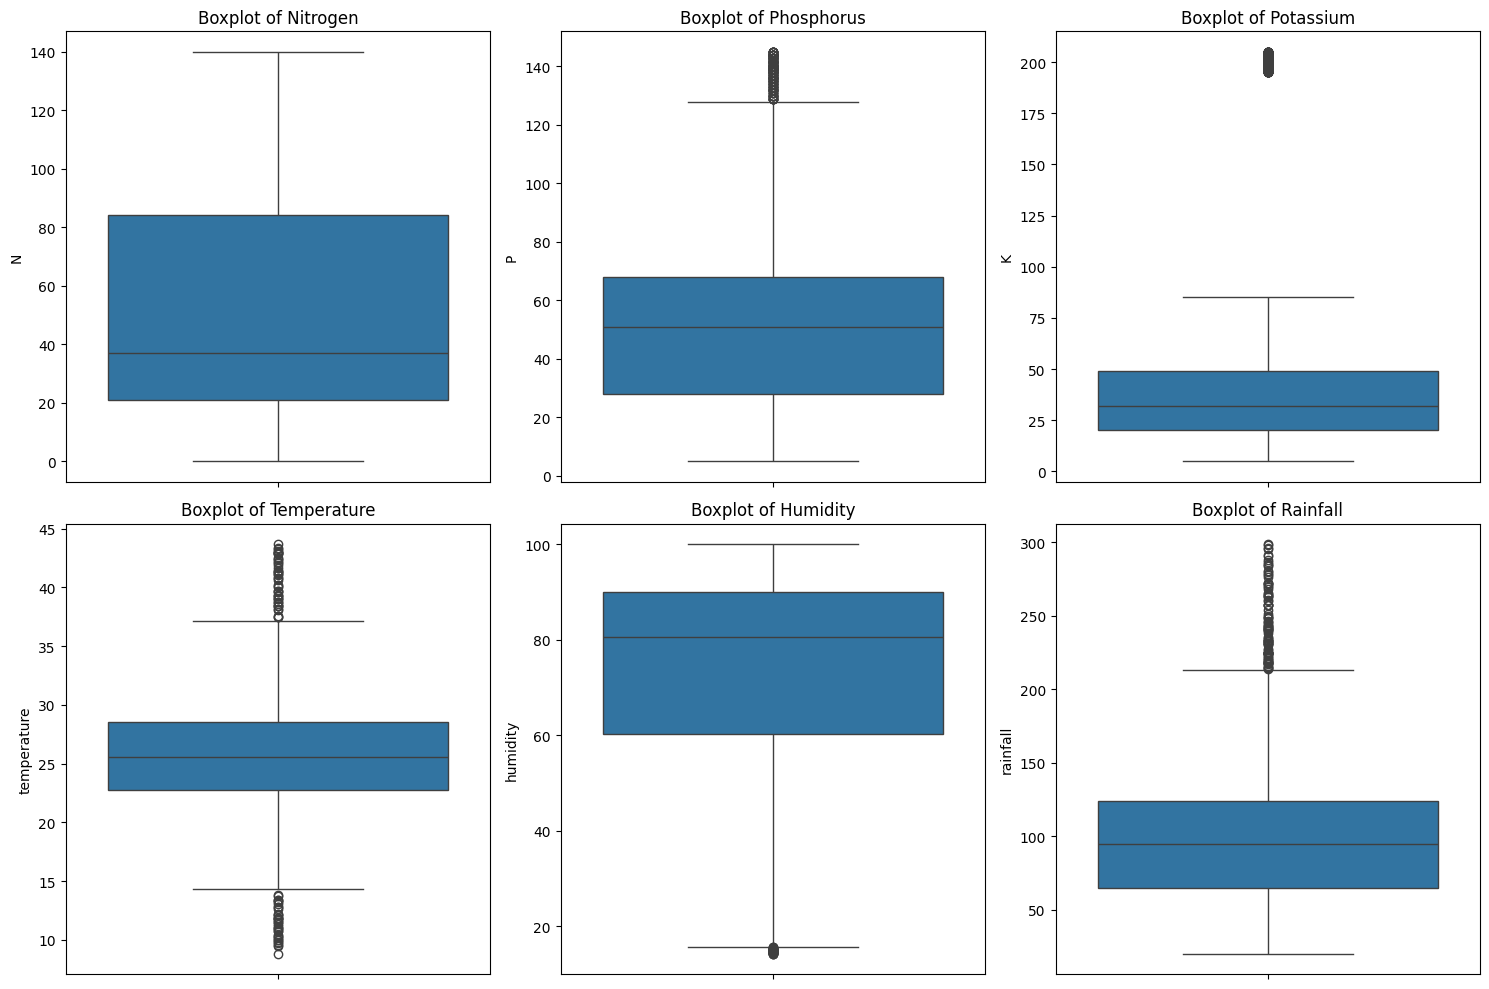

In [11]:
# Box plots to check for outliers
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
sns.boxplot(data['N'], ax=axes[0, 0])
axes[0, 0].set_title('Boxplot of Nitrogen')

sns.boxplot(data['P'], ax=axes[0, 1])
axes[0, 1].set_title('Boxplot of Phosphorus')

sns.boxplot(data['K'], ax=axes[0, 2])
axes[0, 2].set_title('Boxplot of Potassium')

sns.boxplot(data['temperature'], ax=axes[1, 0])
axes[1, 0].set_title('Boxplot of Temperature')

sns.boxplot(data['humidity'], ax=axes[1, 1])
axes[1, 1].set_title('Boxplot of Humidity')

sns.boxplot(data['rainfall'], ax=axes[1, 2])
axes[1, 2].set_title('Boxplot of Rainfall')

plt.tight_layout()
plt.show()

In [12]:
# Preparing the data for model training
X = data.drop('label', axis=1)
y = data['label']

In [13]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=50)

In [14]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
# Applying PCA
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [16]:
# Training on Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=50)
clf.fit(X_train_pca, y_train)

RandomForestClassifier(random_state=50)

In [17]:
# Makeing predictions
y_pred = clf.predict(X_test_pca)

In [18]:
# Evaluating the model
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n       apple       1.00      1.00      1.00        26\n      banana       1.00      1.00      1.00        16\n   blackgram       1.00      1.00      1.00        22\n    chickpea       1.00      1.00      1.00        30\n     coconut       1.00      0.93      0.96        28\n      coffee       1.00      0.96      0.98        23\n      cotton       0.96      0.96      0.96        25\n      grapes       1.00      1.00      1.00        30\n        jute       0.89      0.89      0.89        36\n kidneybeans       1.00      1.00      1.00        19\n      lentil       0.96      0.96      0.96        27\n       maize       0.95      0.95      0.95        20\n       mango       0.88      1.00      0.94        23\n   mothbeans       0.96      0.86      0.91        29\n    mungbean       1.00      1.00      1.00        20\n   muskmelon       1.00      1.00      1.00        18\n      orange       0.96      0.93      0.95        29\n      p

In [19]:
# Evaluate the model
accuracy_score(y_test, y_pred)

0.9618181818181818

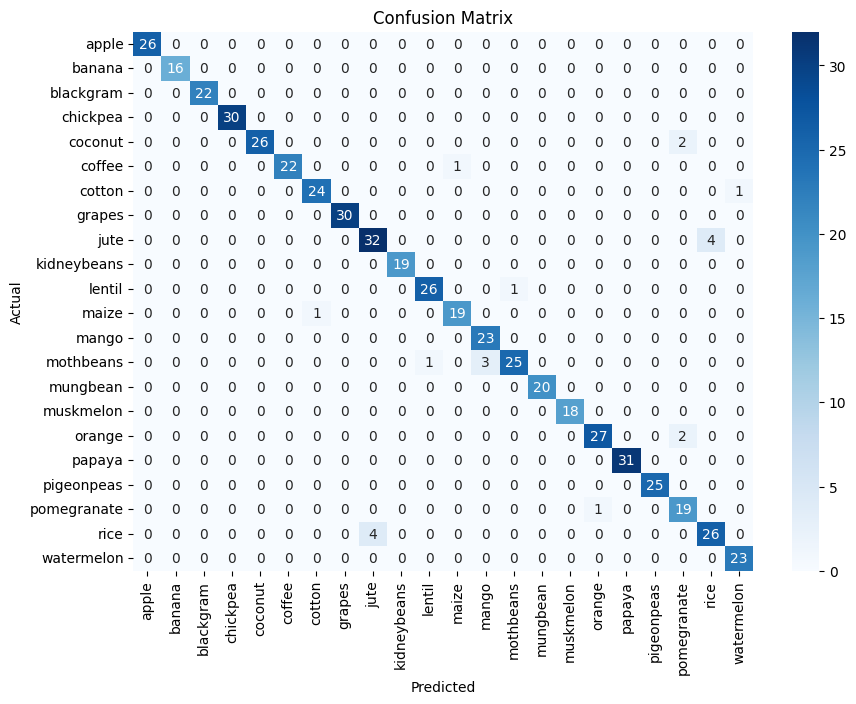

In [20]:
# Confusion matrix for better understanding
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d',
cmap='Blues', xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

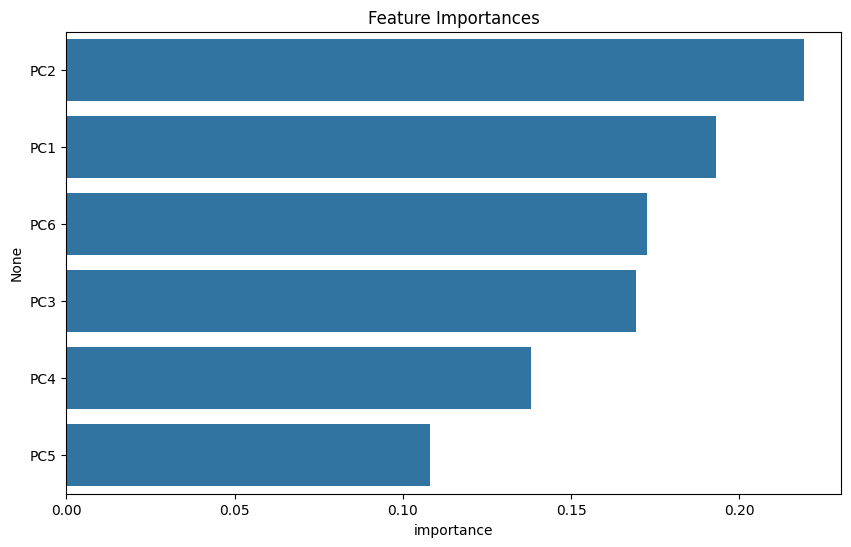

In [21]:
# Feature importance
feature_importances = pd.DataFrame(clf.feature_importances_, index=[f'PC{i+1}' for i in range(pca.n_components_)], columns=['importance']).sort_values('importance', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances['importance'], y=feature_importances.index)
plt.title('Feature Importances')
plt.show()

In [22]:
# Saving the model for future use
joblib.dump(clf, 'crop_recommendation_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(pca, 'pca.pkl')

['pca.pkl']

In [23]:
# Function to make predictions with the trained model
def recommend_crop(N, P, K, temperature, humidity, ph, rainfall):
    model = joblib.load('crop_recommendation_model.pkl')
    scaler = joblib.load('scaler.pkl')
    pca = joblib.load('pca.pkl')
    data = np.array([[N, P, K, temperature, humidity, ph, rainfall]])
    data = scaler.transform(data)
    data = pca.transform(data)
    prediction = model.predict(data)
    return prediction[0]

In [24]:
# Example prediction
recommend_crop(90, 42, 43, 20.879744, 82.002744, 6.502985, 202.935536)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


'rice'